# Week 8

## Web Scraping

Web Scraping refers to the process of extracting data from a website or specific webpage.

This can be done either manually or by using software tools called web scrapers. These software tools are usually preferred as they are faster, more powerful and therefore more convenient.

Once web scrapers extract the user’s desired data, they often also restructure the data into a more convenient format such as an Excel spreadsheet.

With web scraping, a user is able to select any website they’d want to extract data from, build their web scraping project and extract the data.

When we visit a web page, our web browser makes a request to a web server. This request is called a GET request, since we’re getting files from the server. The server then sends back files that tell our browser how to render the page for us. These files will typically include:

HTML — the main content of the page.
CSS — used to add styling to make the page look nicer.
JS — Javascript files add interactivity to web pages.
Images — image formats, such as JPG and PNG, allow web pages to show pictures.
After our browser receives all the files, it renders the page and displays it to us.

When we perform web scraping, we’re interested in the main content of the web page, so we look primarily at the HTML.

Note: Review HTML on w3schools for more information - https://www.w3schools.com/html/

Web Scrapping using requests and beautiful soup.

https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/



The client makes HTTP requests to the server, and the server can respond with an HTTP response. So if you want to simply fetch some data from the server, then you can use the GET HTTP verb. On the other hand, if you want to send some data to the server POST verb will be used. But as we'll only be retrieving data in this course, we will mostly focus on the GET method.


Scrapping Websites Synopsis:
Extract the HTML content using the requests library.
Analyze the HTML structure and identify the tags which have our content.
Extract the tags using Beautiful Soup and put the data in a Python list.

Beautiful Soup is one of the most commonly used Python libraries for web scraping. 

We create a BeautifulSoup object by passing two arguments:

r.content : It is the raw HTML content.
html5lib : Specifying the HTML parser we want to use.



# Scraping whosdatedwho with Requests

The Python libraries requests and Beautiful Soup are powerful tools for web scrapping.
Decipher data encoded in URLs
Use requests and Beautiful Soup for scraping and parsing data from the Web
Step through a web scraping pipeline from start to finish
Build a script that fetches job offers from the Web and displays relevant information in your console.

In [1]:
import json
from bs4 import BeautifulSoup
import hashlib
import requests
import os,sys


Decoding the URL:You can deconstruct the above URL into two main parts:

The base URL represents the path to the search functionality of the website. 
The specific site location that ends with .html is the path to the job description’s unique resource.

First we inspect the webpage and look for 'unique' elements that would enable us to identify what we want to scrape from the website. Refering to the picture below, we need the name of the person that the celebrity dated. Here, we find that these are stored in an element 'div' where the id start with 'dating-'. Next, we find that the name of the person is the text in the h4 header. 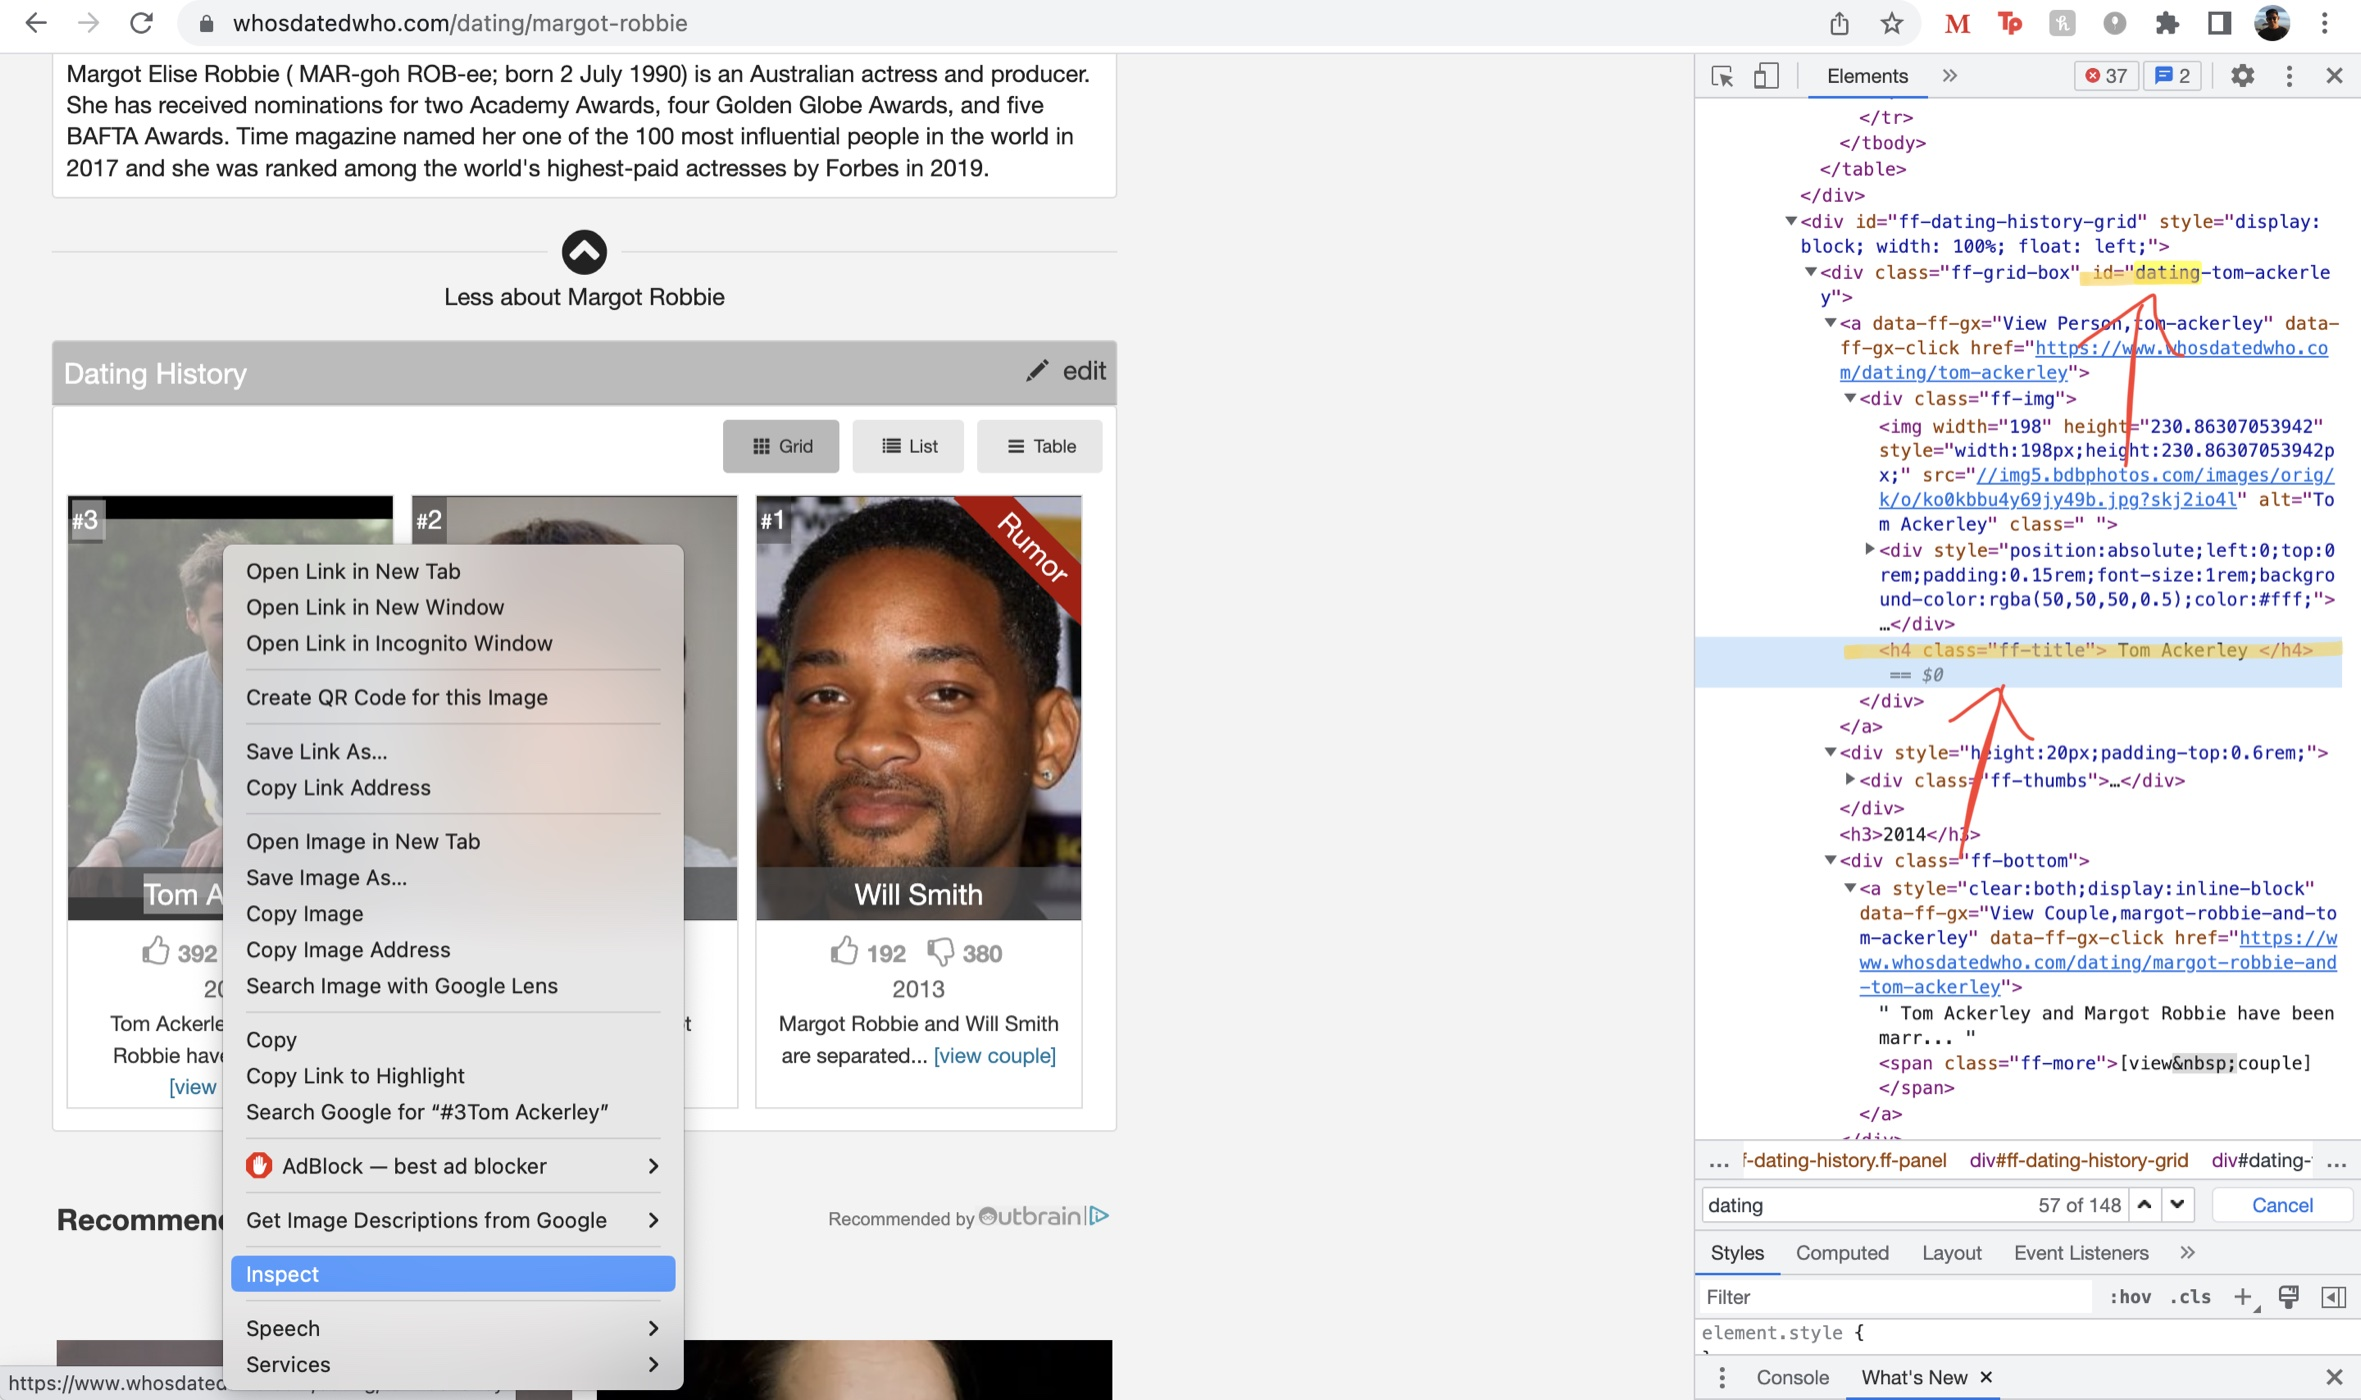

In [2]:
def extract_html(celeb):
    '''
    This function gets the HTML content from a page
    '''
    base = 'https://www.whosdatedwho.com/dating/'
    url = base + celeb
    html_content = requests.get(url).text # gets the requested URL
    return html_content

def get_rel(celeb_path):
    soup = BeautifulSoup(open(celeb_path,'r'),'html.parser') # create an instance of BeautifulSoup
    d = soup.find_all('div',id=lambda x: x and x.startswith('dating-')) #the id of the 'div' should start with 'dating-'
    relationships= []
    if not d: # if soup did not find anything
        return relationships
    else:
        for row in d:
            raw = row.h4.text # gets what's in the h4 header
            # print(raw)
            step1 = raw.split() # removes the large number of blank spaces
            relationship = " ".join(step1) # adds only one space
            relationships.append(relationship)
        return relationships

In [3]:
cache_dir = "/content/cache"
path = os.getcwd()
abs_cache_dir = os.path.join(os.path.abspath(os.path.join(path, os.pardir)), cache_dir) # directory of the cache
    # if the directory doesn't exist, create it
if not os.path.isdir(abs_cache_dir):
    os.mkdir(abs_cache_dir)


celebs = ["robert-downey-jr", 'margot-robbie', 'christian-bale']
data = {}
for celeb in celebs:
    # for every celeb, we want to see if a local cached webage exists
    hash = hashlib.sha1(celeb.encode("UTF-8")).hexdigest() # in theory, this can be anything. 
    celeb_path = os.path.join(abs_cache_dir, (hash + '.html')) # the path to the cached webpage
    if os.path.isfile(celeb_path):
        # if a cached webpage exists, we read from the cache. No need to send requests
        print("===READING===")
        relationships = get_rel(celeb_path)

    else:
        print("===FETCHING===")
        # if cached webpage does not exist, we need to fetch the webpage
        # we also store the webpage in our cache, in case we need it later
        with open(celeb_path, 'w') as f:
            content = extract_html(celeb) 
            f.write(content)
        # this has saved our webpage at the path celeb_path
        relationships = get_rel(celeb_path) # gets the relationships from webpage in cache

    data[celeb] = relationships
    

    

===READING===
===READING===
===READING===


In [4]:
data

{'robert-downey-jr': ['Susan Downey',
  'Calista Flockhart',
  'Marisa Tomei',
  'Deborah Falconer',
  'Sarah Jessica Parker',
  'Jennifer Jason Leigh'],
 'margot-robbie': ['Tom Ackerley', 'Henry Aitken', 'Will Smith'],
 'christian-bale': ['Sibi Blazic',
  'Anna Friel',
  'Samantha Mathis',
  'Drew Barrymore']}

# Data Cleaning

Text is a form of unstructured data. According to Wikipedia, unstructured data is described as “information that either does not have a pre-defined data model or is not organized in a pre-defined manner.” [Source: Wikipedia].

Unfortunately, computers aren’t like humans; Machines cannot read raw text in the same way that we humans can. When we are working with textual data, we cannot go from our raw text straight to our Machine learning model. Instead, we must follow a process of first cleaning the text then encoding it into a machine-readable format.

Steps in data cleaning:
* Case Normalization
* Removing Stopwords
* Removing Unicode
* Removing URLs, Hashtags, Punctuation, Mentions, etc.

Reference:

https://towardsdatascience.com/how-to-clean-your-data-in-python-8f178638b98d

https://towardsdatascience.com/a-guide-to-cleaning-text-in-python-943356ac86ca


## Case Normalization

When we write, we capitalize various words in our sentence/paragraph for different reasons. For example, we start a new sentence with a capital letter or if something is a noun, we would capitalize the first letter to indicate we are talking about a place/person, etc.

To a human, we can read a text and intuitively tell that “The” which is used at the beginning of a sentence is the same word as “the” which is found later in the middle of the sentence, however, a computer cannot — “The” and “the” are seen as 2 different words by a machine.

Therefore, it’s important to normalize the case of our words so that every word is in the same case and the computer doesn’t process the same word as 2 different tokens.


In [5]:
text = "Yesterday, I visited the Louvre Museum in Paris, France with my friend @EmilySmith, " \
    "where we saw Leonardo da Vinci's masterpiece, the Mona Lisa. 🎨 \n It was a surreal experience, "\
    "and we even got a glimpse of the Venus de Milo sculpture. 😍\n After the museum, we stopped at a quaint café, " \
    "Les Deux Magots, recommended by @FrenchFoodie, for a cup of coffee ☕ and a croissant 🥐.\n Later that evening, " \
    "we went to see the Eiffel Tower and watched the dazzling light show. ✨ \n@ParisTourism provided us with some " \
    "great tips for the best views of the tower.\n" \
    "#Paris #LouvreMuseum #MonaLisa #VenusDeMilo #LesDeuxMagots #EiffelTower #CoffeeLover #CroissantAddict 🇫🇷🗼🎭\n"\
    "If you're interested in visiting the Louvre Museum, you can find more information at https://www.louvre.fr/en/ "\
    "or follow them on Twitter at @MuseeLouvre."
text = text.lower()
print(text)

yesterday, i visited the louvre museum in paris, france with my friend @emilysmith, where we saw leonardo da vinci's masterpiece, the mona lisa. 🎨 
 it was a surreal experience, and we even got a glimpse of the venus de milo sculpture. 😍
 after the museum, we stopped at a quaint café, les deux magots, recommended by @frenchfoodie, for a cup of coffee ☕ and a croissant 🥐.
 later that evening, we went to see the eiffel tower and watched the dazzling light show. ✨ 
@paristourism provided us with some great tips for the best views of the tower.
#paris #louvremuseum #monalisa #venusdemilo #lesdeuxmagots #eiffeltower #coffeelover #croissantaddict 🇫🇷🗼🎭
if you're interested in visiting the louvre museum, you can find more information at https://www.louvre.fr/en/ or follow them on twitter at @museelouvre.


## Stopwords

In the majority of natural language tasks, we want our machine learning models to identify the words within a document that provide value to the document. For example in a sentiment analysis task, we want to find the word (or words) that tip the sentiment of the text in one direction or the other.

In the English language, there are words that are used more frequently than other words in the language but they do not necessarily add more value to a sentence, hence it is safe to say that we can ignore them by removing the from our text.

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
print(stop_words)

{"you'll", 'these', 'most', 'mightn', 'yourselves', 'under', 'more', 'y', "haven't", 'now', 'just', 'himself', 'below', 'who', 'at', 'with', 'further', "you'd", 'been', 'can', "shouldn't", "wasn't", 'we', 'has', "couldn't", 'which', 'all', 'again', 'such', 'not', 'll', "weren't", 'you', 'they', 'o', 'be', 'our', 'his', 'will', 'do', 'a', 'had', 'hasn', 's', 'of', 're', "didn't", 'myself', 'on', 'being', 'about', 'why', 'so', 'aren', 'needn', "don't", "needn't", "it's", 'wouldn', 'what', 'and', "hasn't", "isn't", 'because', 'mustn', 'won', 'how', 'ma', 'was', 'ours', 'isn', 'shan', 'during', 'each', 'for', 'by', 'herself', 'were', "should've", 'doing', 'couldn', 'until', 'off', 'own', 'this', 'the', 'here', 'hadn', 'wasn', 'as', 'itself', 'against', "you're", 'didn', "you've", 'into', 'yours', 'themselves', 'whom', 'shouldn', 'between', 'there', 'too', 'yourself', 'than', 'her', 'to', 'that', 'or', 'him', "shan't", 'then', 'before', 'hers', 'am', 'up', 'through', 'm', 'my', 'its', 'havi

In [8]:
text = " ".join([word for word in text.split() if word not in stop_words])

In [9]:
text

"yesterday, visited louvre museum paris, france friend @emilysmith, saw leonardo da vinci's masterpiece, mona lisa. 🎨 surreal experience, even got glimpse venus de milo sculpture. 😍 museum, stopped quaint café, les deux magots, recommended @frenchfoodie, cup coffee ☕ croissant 🥐. later evening, went see eiffel tower watched dazzling light show. ✨ @paristourism provided us great tips best views tower. #paris #louvremuseum #monalisa #venusdemilo #lesdeuxmagots #eiffeltower #coffeelover #croissantaddict 🇫🇷🗼🎭 interested visiting louvre museum, find information https://www.louvre.fr/en/ follow twitter @museelouvre."

## Removing unicode

ASCII formats emojis and other non-ASCII characters as Unicode. Essentially, Unicode is a universal character encoding standard in which each character and symbol in all languages are assigned a code. Unicode is required because it is the only encoding standard that allows us to retrieve or join data using a variety of different languages but the issue is… It’s unreadable in ASCII format.

A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.

RegEx can be used to check if a string contains the specified search pattern.

Python has a built-in package called re, which can be used to work with Regular Expressions.

Import the re module:

In [10]:
import re

In [11]:
# encoding the text to ASCII format
text_encode = text.encode(encoding="ascii", errors="ignore")
# decoding the text
text_decode = text_encode.decode()
# cleaning the text to remove extra whitespace 
text = " ".join([word for word in text_decode.split()])
print(text)

yesterday, visited louvre museum paris, france friend @emilysmith, saw leonardo da vinci's masterpiece, mona lisa. surreal experience, even got glimpse venus de milo sculpture. museum, stopped quaint caf, les deux magots, recommended @frenchfoodie, cup coffee croissant . later evening, went see eiffel tower watched dazzling light show. @paristourism provided us great tips best views tower. #paris #louvremuseum #monalisa #venusdemilo #lesdeuxmagots #eiffeltower #coffeelover #croissantaddict interested visiting louvre museum, find information https://www.louvre.fr/en/ follow twitter @museelouvre.


# Removing URLs, hashtags, mentions and punctuation

Depending on the type of data we are dealing with, we may face various challenges that add noise. For instance, if we are working with data from Twitter, it’s not going to be unusual to find various hashtags and mentions — which refers to a tweet that contains another user's username in Twitter lingo.

If these features are not valuable for the problem that we are attempting to solve then we are better off removing them from our data. However, since we cannot depend on a defined character in many of the instances, we can leverage the power of a pattern-matching tool called Regex to aid us.

In [12]:
# removing mentions 
text = re.sub("@\S+", "", text)
print(text)

yesterday, visited louvre museum paris, france friend  saw leonardo da vinci's masterpiece, mona lisa. surreal experience, even got glimpse venus de milo sculpture. museum, stopped quaint caf, les deux magots, recommended  cup coffee croissant . later evening, went see eiffel tower watched dazzling light show.  provided us great tips best views tower. #paris #louvremuseum #monalisa #venusdemilo #lesdeuxmagots #eiffeltower #coffeelover #croissantaddict interested visiting louvre museum, find information https://www.louvre.fr/en/ follow twitter 


In [13]:
# remove urls
text = re.sub("https?:\/\/[a-z0-9-]+(?:\.[a-z0-9-]+)+[/?#]\S*", "", text) # chatgpt!, show https://regexr.com/
print(text)

yesterday, visited louvre museum paris, france friend  saw leonardo da vinci's masterpiece, mona lisa. surreal experience, even got glimpse venus de milo sculpture. museum, stopped quaint caf, les deux magots, recommended  cup coffee croissant . later evening, went see eiffel tower watched dazzling light show.  provided us great tips best views tower. #paris #louvremuseum #monalisa #venusdemilo #lesdeuxmagots #eiffeltower #coffeelover #croissantaddict interested visiting louvre museum, find information  follow twitter 


In [14]:
# remove hashtags
# we just remove the '#' and keep the word that comes after
text = re.sub("#", "", text)
print(text)

yesterday, visited louvre museum paris, france friend  saw leonardo da vinci's masterpiece, mona lisa. surreal experience, even got glimpse venus de milo sculpture. museum, stopped quaint caf, les deux magots, recommended  cup coffee croissant . later evening, went see eiffel tower watched dazzling light show.  provided us great tips best views tower. paris louvremuseum monalisa venusdemilo lesdeuxmagots eiffeltower coffeelover croissantaddict interested visiting louvre museum, find information  follow twitter 


In [15]:
# remove punctuation
#The first two arguments for string.translate method is empty strings, and the third input is a Python list of the punctuation that should be removed.
# other ways on: https://www.geeksforgeeks.org/python-remove-punctuation-from-string/
import string
text = text.translate(str.maketrans('', '', string.punctuation))
print(text)

yesterday visited louvre museum paris france friend  saw leonardo da vincis masterpiece mona lisa surreal experience even got glimpse venus de milo sculpture museum stopped quaint caf les deux magots recommended  cup coffee croissant  later evening went see eiffel tower watched dazzling light show  provided us great tips best views tower paris louvremuseum monalisa venusdemilo lesdeuxmagots eiffeltower coffeelover croissantaddict interested visiting louvre museum find information  follow twitter 


## Putting everything together

In [16]:
def cleanTweets(text):
    text = text.lower()
    
    text = " ".join([word for word in text.split() if word not in stop_words]) 
    
    text_encode = text.encode(encoding="ascii", errors="ignore")
    text_decode = text_encode.decode()
    text = " ".join([word for word in text_decode.split()])

    text = re.sub("@\S+", "", text)
    text = re.sub("https?:\/\/[a-z0-9-]+(?:\.[a-z0-9-]+)+[/?#]\S*", "", text) 
    
    text = re.sub("#", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

In [17]:
new_text = "Last weekend, I went on a hiking trip to Yellowstone National Park with @AdventureTravelCo. "\
 "🌲🏞️ It was amazing to see the geysers erupt and the wildlife roam freely. \n 🦌🐻 We even saw Old Faithful, which was breathtaking. "\
 "💨 After a day of hiking, we settled down for the night in our cozy cabins at the @YellowstoneLodging. \n "\
 "🛏️ The next day, we visited the Grand Canyon of Yellowstone and saw the stunning waterfalls. 🌊 \n If you're planning a trip to Yellowstone, "\
 "I highly recommend checking out @YellowstoneNPS for more information. #Yellowstone #NationalPark #Hiking #AdventureTravel #OldFaithful"\
 " #YellowstoneLodging #GrandCanyonOfYellowstone 🏕️🌄🌊 \n "\
 "If you want to learn more about Yellowstone National Park, visit https://www.nps.gov/yell/index.htm or "\
 "book your trip with Adventure Travel Co at https://adventuretravelco.com/yellowstone-hiking-tour/."

In [18]:
print(new_text)

Last weekend, I went on a hiking trip to Yellowstone National Park with @AdventureTravelCo. 🌲🏞️ It was amazing to see the geysers erupt and the wildlife roam freely. 
 🦌🐻 We even saw Old Faithful, which was breathtaking. 💨 After a day of hiking, we settled down for the night in our cozy cabins at the @YellowstoneLodging. 
 🛏️ The next day, we visited the Grand Canyon of Yellowstone and saw the stunning waterfalls. 🌊 
 If you're planning a trip to Yellowstone, I highly recommend checking out @YellowstoneNPS for more information. #Yellowstone #NationalPark #Hiking #AdventureTravel #OldFaithful #YellowstoneLodging #GrandCanyonOfYellowstone 🏕️🌄🌊 
 If you want to learn more about Yellowstone National Park, visit https://www.nps.gov/yell/index.htm or book your trip with Adventure Travel Co at https://adventuretravelco.com/yellowstone-hiking-tour/.


In [19]:
cleaned_text = cleanTweets(new_text)

In [20]:
print(cleaned_text)

last weekend went hiking trip yellowstone national park  amazing see geysers erupt wildlife roam freely even saw old faithful breathtaking day hiking settled night cozy cabins  next day visited grand canyon yellowstone saw stunning waterfalls planning trip yellowstone highly recommend checking  information yellowstone nationalpark hiking adventuretravel oldfaithful yellowstonelodging grandcanyonofyellowstone want learn yellowstone national park visit  book trip adventure travel co 


In [21]:
from google.colab import files
uploaded = files.upload()

Saving EN_week8_(1)_(1).ipynb to EN_week8_(1)_(1).ipynb


In [28]:
import pandas as pd
df = pd.read_excel('LabeledText.xlsx')

In [23]:
df.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive


In [29]:
df["clean_text"] = df["Caption"].apply(cleanTweets)

In [30]:
df.head()

,File Name,Caption,LABEL,clean_text
0,1.txt,How I feel today #legday #jelly #aching #gym,negative,feel today legday jelly aching gym
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative,absolute disgrace two carriages bangor half w...
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive,valentines 1 nephews elated sometimes little t...
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral,betterfeelingfilms rt via instagram first day ...
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive,zoes first love rattled


In [26]:
df['Caption'].iloc[3]

"betterfeelingfilms: RT via Instagram: First day of filming #powerless back in 2011. Can't ¡\xad "

In [27]:
df['clean_text'].iloc[3]

'betterfeelingfilms rt via instagram first day filming powerless back 2011 cant'